In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix_dataset = pd.read_csv("/content/drive/MyDrive/Netflix dataset/combined_data_1.txt.zip",header = None,names=['Cust_id',"Rating"],usecols=[0,1])
netflix_dataset.head()

,Cust_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['Rating']


In [ ]:
#No. of movies in our dataset
movie_count


4499

In [ ]:
total_count=netflix_dataset['Cust_id'].nunique()
total_count #total_count is sum of both unique movie id and customer id

475257

In [ ]:
# No. of customers in our dataset
customer_count = total_count-movie_count
customer_count


470758

In [ ]:
#No. of ratings that are given by users
rating_count = netflix_dataset['Cust_id'].count()-movie_count
rating_count

24053764

In [ ]:
#users that have rated the movie
stars= netflix_dataset['Rating'].value_counts()
stars

,count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [ ]:
#Creating a Dataframe for movie_id
movie_id= None
movie_np = []
for i in netflix_dataset['Cust_id']:
  if ':'in i:
    movie_id=int(i.replace(":"," "))
  movie_np.append(movie_id)

In [ ]:
netflix_dataset['Movie_id'] = movie_np
netflix_dataset

,Cust_id,Rating,Movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.dropna(inplace=True)

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_id   object 
 1   Rating    float64
 2   Movie_id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix_dataset['Cust_id']= netflix_dataset['Cust_id'].astype(int)
netflix_dataset

,Cust_id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
#Pre-Filtering
#Remove all the users that have rated less no. of movie
#Remove all the movies that have recieved less no. of rating


In [ ]:
dataset_movie_summary=netflix_dataset["Movie_id"].value_counts()
dataset_movie_summary

,count
Movie_id,
1905,193941
2152,162597
3860,160454
4432,156183
571,154832
...,...
4294,44
915,43
3656,42


In [ ]:
#what is benchmark
# benchmark is a range or value that decides if value is below the benchmark value then it should be deleted
# movie benchmark is 908 if rating of a movie is below 908 then it will be deleted from dataset



In [ ]:

#creating a benchmark for movie
movie_benchmark= round(dataset_movie_summary.quantile(0.6),0)
movie_benchmark

908.0

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary<movie_benchmark].index
drop_movie_list

Index([1598, 1733, 1647, 4099, 1616, 1446,  263, 4259,  160, 1988,
       ...
       1858, 4035, 3693, 2805,  820, 4294,  915, 3656, 4338, 4362],
      dtype='int64', name='Movie_id', length=2699)

In [ ]:
dataset_cust_summary= netflix_dataset['Cust_id'].value_counts()
dataset_cust_summary

,count
Cust_id,
305344,4467
387418,4422
2439493,4195
1664010,4019
2118461,3769
...,...
1300341,1
2550360,1
11848,1


In [ ]:
cust_benchmark = round(dataset_cust_summary.quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
#Any customer that has rated below 36 movies will be removed
drop_cust_list = dataset_cust_summary[dataset_cust_summary<cust_benchmark].index
drop_cust_list

Index([2194851,  600295, 1739398, 1157368,  532108, 2157249,  256134,  640441,
       1272324, 1346990,
       ...
       1969065,  899932,  611596, 2147176,  811650, 1300341, 2550360,   11848,
        930788,  594210],
      dtype='int64', name='Cust_id', length=282042)

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_id'].isin(drop_cust_list)]
netflix_dataset = netflix_dataset[~netflix_dataset["Movie_id"].isin(drop_movie_list)]

#MODEL BUILDING

In [ ]:
df_title= pd.read_csv("/content/movies.csv",encoding="ISO-8859-1",usecols=[0,1,2])
df_title

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
df_title['genres']=df_title['genres'].str.split('|')
df_title= df_title.explode('genres').reset_index(drop=True)
df_title

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
54401,131258,The Pirates (2014),Adventure
54402,131260,Rentun Ruusu (2001),(no genres listed)
54403,131262,Innocence (2014),Adventure
54404,131262,Innocence (2014),Fantasy


In [ ]:
np.version

<module 'numpy.version' from '/usr/local/lib/python3.12/dist-packages/numpy/version.py'>

In [ ]:
#!pip install numpy==1.26.4

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2555151 sha256=22b578634aa09f14a777803ca34cbb17ca6453ee90c40995f32680656ec3d892
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19695836 entries, 696 to 24056846
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_id   int64  
 1   Rating    float64
 2   Movie_id  int64  
dtypes: float64(1), int64(2)
memory usage: 601.1 MB


In [ ]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate as surprise_cv
reader=Reader()
data=Dataset.load_from_df(netflix_dataset[['Cust_id','Movie_id',"Rating"]][:1500000],reader)

In [ ]:
model=SVD()

In [ ]:
surprise_cv(model,data,measures =['RMSE'],cv=3)

{'test_rmse': array([0.97546658, 0.97740968, 0.97741687]),
 'fit_time': (24.94011378288269, 26.93432593345642, 26.287458896636963),
 'test_time': (6.79961633682251, 6.280951261520386, 6.186631441116333)}

In [ ]:
user_rating=netflix_dataset[netflix_dataset["Cust_id"]==2591364]
user_rating

,Cust_id,Rating,Movie_id
242336,2591364,2.0,46
377930,2591364,2.0,108
495835,2591364,4.0,143
666074,2591364,5.0,175
813455,2591364,4.0,191
...,...,...,...
23367676,2591364,2.0,4369
23586623,2591364,2.0,4402
23617430,2591364,3.0,4418
23802319,2591364,3.0,4432


In [ ]:
# user_2591364 has rated 243 movies


In [ ]:
user_2591364=df_title.copy()
user_2591364

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
54401,131258,The Pirates (2014),Adventure
54402,131260,Rentun Ruusu (2001),(no genres listed)
54403,131262,Innocence (2014),Adventure
54404,131262,Innocence (2014),Fantasy


In [ ]:
user_259136=user_2591364[~ user_2591364['movieId'].isin(drop_movie_list)]
user_2591364

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
54401,131258,The Pirates (2014),Adventure
54402,131260,Rentun Ruusu (2001),(no genres listed)
54403,131262,Innocence (2014),Adventure
54404,131262,Innocence (2014),Fantasy


In [ ]:
#Prediction Part
user_2591364["Estimated Score"]= user_2591364['movieId'].apply(lambda x:model.predict(2591364,x).est)
user_2591364

,movieId,title,genres,Estimated Score
0,1,Toy Story (1995),Adventure,3.46029
1,1,Toy Story (1995),Animation,3.46029
2,1,Toy Story (1995),Children,3.46029
3,1,Toy Story (1995),Comedy,3.46029
4,1,Toy Story (1995),Fantasy,3.46029
...,...,...,...,...
54401,131258,The Pirates (2014),Adventure,3.46029
54402,131260,Rentun Ruusu (2001),(no genres listed),3.46029
54403,131262,Innocence (2014),Adventure,3.46029
54404,131262,Innocence (2014),Fantasy,3.46029


In [ ]:
user_2591364['Estimated Score'].value_counts()

,count
Estimated Score,
3.460290,54158
3.400422,5
2.507503,4
3.467636,4
3.396028,3
...,...
3.745954,1
3.589074,1
3.305611,1


#Find out the list of most popular and liked genre


In [ ]:
df=pd.merge(netflix_dataset,df_title,left_on='Movie_id',right_on='movieId')
df

In [ ]:
df['genres'].value_counts()

In [ ]:
genre_popularity = df.groupby('genres')['Rating'].sum().sort_values(ascending=False)
genre_popularity

In [ ]:
import matplotlib.pyplot as plt

genre_popularity.head(10).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Popularity(Likes)")
plt.title("Top 10 Most Popular Netflix Genres")
plt.show()


In [ ]:
genre_rating = df.groupby('genres')['Rating'].mean().sort_values(ascending=False)
genre_rating

In [ ]:

top_genre = genre_popularity.idxmax()
print("Most liked genre is:", top_genre)


Most liked genre is: Drama


In [ ]:
df1 = df.sort_values(by='Rating', ascending=False)

In [ ]:
df1

In [ ]:
user_2591364=user_2591364.sort_values(by='Estimated Score',ascending=False)
user_2591364

,movieId,title,genres,Estimated Score
81,33,Wings of Courage (1995),IMAX,4.596486
80,33,Wings of Courage (1995),Romance,4.596486
79,33,Wings of Courage (1995),Adventure,4.596486
649,316,Stargate (1994),Action,4.421693
650,316,Stargate (1994),Adventure,4.421693
...,...,...,...,...
472,225,Disclosure (1994),Drama,2.239964
473,225,Disclosure (1994),Thriller,2.239964
280,127,"Silences of the Palace, The (Saimt el Qusur) (...",Drama,2.157170
595,289,Only You (1994),Comedy,2.122448


## Create Model that finds the best suited Movie for one user in every genre


In [ ]:
ev_genre = user_2591364['genres'].unique()

In [ ]:
user_2591364['genres'].unique()

array(['IMAX', 'Romance', 'Adventure', 'Action', 'Sci-Fi', 'Drama',
       'Mystery', 'Thriller', 'Comedy', 'Horror', 'Crime', 'Children',
       'Documentary', 'Animation', 'Musical', 'Fantasy', 'War', 'Western',
       'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
user_2591364

,movieId,title,genres,Estimated Score
81,33,Wings of Courage (1995),IMAX,4.596486
80,33,Wings of Courage (1995),Romance,4.596486
79,33,Wings of Courage (1995),Adventure,4.596486
649,316,Stargate (1994),Action,4.421693
650,316,Stargate (1994),Adventure,4.421693
...,...,...,...,...
472,225,Disclosure (1994),Drama,2.239964
473,225,Disclosure (1994),Thriller,2.239964
280,127,"Silences of the Palace, The (Saimt el Qusur) (...",Drama,2.157170
595,289,Only You (1994),Comedy,2.122448


In [ ]:
recommended_movies_per_genre = pd.DataFrame()
for genre in ev_genre:
    genre_df = user_2591364[user_2591364['genres'] == genre].sort_values(by='Estimated Score', ascending=False)
    if not genre_df.empty:
        recommended_movies_per_genre = pd.concat([recommended_movies_per_genre, genre_df.iloc[[0]]])
recommended_movies_per_genre

,movieId,title,genres,Estimated Score
81,33,Wings of Courage (1995),IMAX,4.596486
80,33,Wings of Courage (1995),Romance,4.596486
79,33,Wings of Courage (1995),Adventure,4.596486
649,316,Stargate (1994),Action,4.421693
651,316,Stargate (1994),Sci-Fi,4.421693
447,209,White Man's Burden (1995),Drama,4.340283
76,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery,4.279832
78,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Thriller,4.279832
667,325,National Lampoon's Senior Trip (1995),Comedy,4.158405
526,253,Interview with the Vampire: The Vampire Chroni...,Horror,4.022302


# Find what Genre Movies have received the best and worst ratings based on User Rating

In [ ]:
best_rating_movies=recommended_movies_per_genre[['title',"Estimated Score"]]
best_rating_movies


,title,Estimated Score
81,Wings of Courage (1995),4.596486
80,Wings of Courage (1995),4.596486
79,Wings of Courage (1995),4.596486
649,Stargate (1994),4.421693
651,Stargate (1994),4.421693
447,White Man's Burden (1995),4.340283
76,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),4.279832
78,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),4.279832
667,National Lampoon's Senior Trip (1995),4.158405
526,Interview with the Vampire: The Vampire Chroni...,4.022302


In [ ]:
worst_rating = pd.DataFrame()
for i in ev_genre:
  worst = user_2591364[user_2591364['genres']==i].sort_values(by="Estimated Score",ascending=True)
  if not worst.empty:
    worst_rating=pd.concat([worst_rating,worst.iloc[[0]]])
worst_rating

,movieId,title,genres,Estimated Score
43526,104129,Man of Tai Chi (2013),IMAX,3.460290
596,289,Only You (1994),Romance,2.122448
214,95,Broken Arrow (1996),Adventure,2.625349
391,181,Mighty Morphin Power Rangers: The Movie (1995),Action,2.357736
60,24,Powder (1995),Sci-Fi,2.978017
280,127,"Silences of the Palace, The (Saimt el Qusur) (...",Drama,2.157170
407,188,"Prophecy, The (1995)",Mystery,2.538674
473,225,Disclosure (1994),Thriller,2.239964
595,289,Only You (1994),Comedy,2.122448
406,188,"Prophecy, The (1995)",Horror,2.538674


In [ ]:
worst_rated_movies_per_genre = worst_rating[['title','Estimated Score']]
worst_rated_movies_per_genre

,title,Estimated Score
43526,Man of Tai Chi (2013),3.460290
596,Only You (1994),2.122448
214,Broken Arrow (1996),2.625349
391,Mighty Morphin Power Rangers: The Movie (1995),2.357736
60,Powder (1995),2.978017
280,"Silences of the Palace, The (Saimt el Qusur) (...",2.157170
407,"Prophecy, The (1995)",2.538674
473,Disclosure (1994),2.239964
595,Only You (1994),2.122448
406,"Prophecy, The (1995)",2.538674


In [ ]:
h =user_2591364[(user_2591364['genres']=='(no genres listed)').sort_values(ascending=True)]
h['Estimated Score'].value_counts()

/tmp/ipython-input-434031816.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h =user_2591364[(user_2591364['genres']=='(no genres listed)').sort_values(ascending=True)]


,count
Estimated Score,
3.46029,246


#**Question1--Find out the list of most popular and liked genre**

In [ ]:
top_genre = genre_popularity.idxmax()
print("Most liked genre is:", top_genre)

import matplotlib.pyplot as plt

genre_popularity.head(10).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Popularity(Likes)")
plt.title("Top 10 Most Popular Netflix Genres")
plt.show()



In [ ]:
genre_popularity = df.groupby('genres')['Rating'].sum().sort_values(ascending=False)
genre_popularity

#**Question2-- Create Model that finds the best suited Movie for one user in every genre**

In [ ]:
recommended_movies_per_genre = pd.DataFrame()
for genre in ev_genre:
    genre_df = user_2591364[user_2591364['genres'] == genre].sort_values(by='Estimated Score', ascending=False)
    if not genre_df.empty:
        recommended_movies_per_genre = pd.concat([recommended_movies_per_genre, genre_df.iloc[[0]]])
recommended_movies_per_genre

,movieId,title,genres,Estimated Score
81,33,Wings of Courage (1995),IMAX,4.596486
80,33,Wings of Courage (1995),Romance,4.596486
79,33,Wings of Courage (1995),Adventure,4.596486
649,316,Stargate (1994),Action,4.421693
651,316,Stargate (1994),Sci-Fi,4.421693
447,209,White Man's Burden (1995),Drama,4.340283
76,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery,4.279832
78,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Thriller,4.279832
667,325,National Lampoon's Senior Trip (1995),Comedy,4.158405
526,253,Interview with the Vampire: The Vampire Chroni...,Horror,4.022302


/tmp/ipython-input-3912924962.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'User Rating')

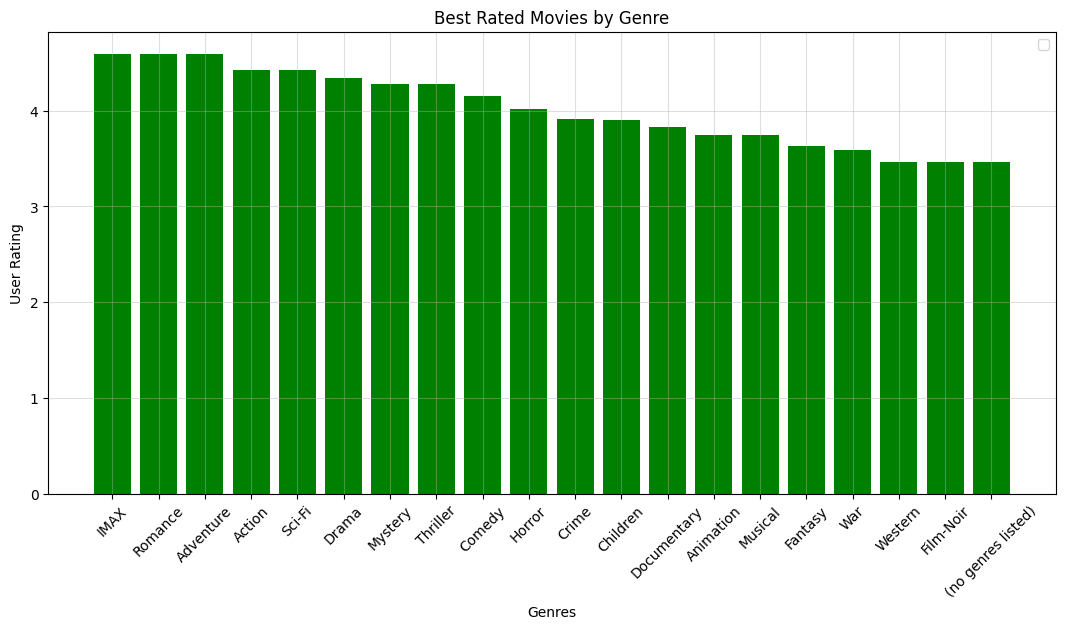

In [ ]:
plt.figure(figsize=(13,6))
plt.bar(best_rating_movies['genres'],best_rating_movies['Estimated Score'],color='green')
plt.legend()
plt.xticks(rotation =45)
plt.title("Best Rated Movies by Genre")
plt.grid(True,alpha=0.4)
plt.xlabel("Genres")
plt.ylabel("User Rating")

#**Question3--Find what Genre Movies have received the best and worst ratings based on User Rating**

In [ ]:
best_rating_movies=recommended_movies_per_genre[['title',"Estimated Score",'genres']]
best_rating_movies


,title,Estimated Score,genres
81,Wings of Courage (1995),4.596486,IMAX
80,Wings of Courage (1995),4.596486,Romance
79,Wings of Courage (1995),4.596486,Adventure
649,Stargate (1994),4.421693,Action
651,Stargate (1994),4.421693,Sci-Fi
447,White Man's Burden (1995),4.340283,Drama
76,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),4.279832,Mystery
78,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),4.279832,Thriller
667,National Lampoon's Senior Trip (1995),4.158405,Comedy
526,Interview with the Vampire: The Vampire Chroni...,4.022302,Horror


/tmp/ipython-input-3912924962.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'User Rating')

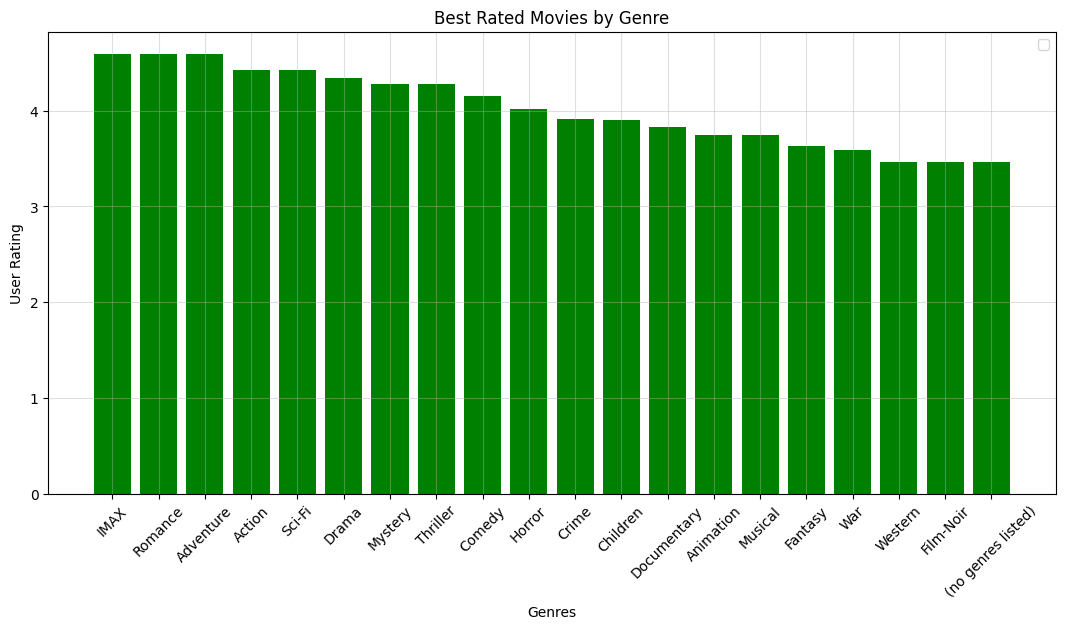

In [ ]:
plt.figure(figsize=(13,6))
plt.bar(best_rating_movies['genres'],best_rating_movies['Estimated Score'],color='green')
plt.legend()
plt.xticks(rotation =45)
plt.title("Best Rated Movies by Genre")
plt.grid(True,alpha=0.4)
plt.xlabel("Genres")
plt.ylabel("User Rating")

#worst Rated movie by user

In [ ]:
worst_rating = pd.DataFrame()
for i in ev_genre:
  worst = user_2591364[user_2591364['genres']==i].sort_values(by="Estimated Score",ascending=True)
  if not worst.empty:
    worst_rating=pd.concat([worst_rating,worst.iloc[[0]]])
worst_rated_movies_per_genre = worst_rating[['title','Estimated Score',"genres"]]
worst_rated_movies_per_genre

,title,Estimated Score,genres
43526,Man of Tai Chi (2013),3.460290,IMAX
596,Only You (1994),2.122448,Romance
214,Broken Arrow (1996),2.625349,Adventure
391,Mighty Morphin Power Rangers: The Movie (1995),2.357736,Action
60,Powder (1995),2.978017,Sci-Fi
280,"Silences of the Palace, The (Saimt el Qusur) (...",2.157170,Drama
407,"Prophecy, The (1995)",2.538674,Mystery
473,Disclosure (1994),2.239964,Thriller
595,Only You (1994),2.122448,Comedy
406,"Prophecy, The (1995)",2.538674,Horror


In [ ]:
worst_rated_movies_per_genre['genres'].index

Index([43526,   596,   214,   391,    60,   280,   407,   473,   595,   406,
         177,   392,   175,   111,   114,   405,   248, 36294, 35775, 34491],
      dtype='int64')

In [1]:
plt.figure(figsize=(13,6))
plt.bar(worst_rated_movies_per_genre['genres'],worst_rated_movies_per_genre['Estimated Score'])
plt.plot(worst_rated_movies_per_genre['genres'],worst_rated_movies_per_genre['Estimated Score'])
plt.legend()
plt.xticks(rotation =45)
plt.title("Worst Rated Movies by Genre")
plt.grid(True,alpha=0.4)
plt.xlabel("Genres")
plt.ylabel("User Rating")

NameError: name 'plt' is not defined